In [1]:
# Import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# Load data
df_students=pd.read_csv('grades.csv',header='infer',delimiter=',')

In [4]:
# Inspect dataset loaded
df_students.head()

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0


In [6]:
# Inspect for missing variables
df_students.isnull().sum()

Name          0
StudyHours    1
Grade         2
dtype: int64

In [10]:
# Drop missing rows
df_students=df_students.dropna(axis=0,how='any')

In [11]:
# Verify for missing variables
df_students.isnull().sum()

Name          0
StudyHours    0
Grade         0
dtype: int64

In [12]:
# Assuming '60' is the grade needed to pass, calculate those who passed
passes=pd.Series(df_students['Grade']>=60)


In [13]:
# Inspect students who passed
passes

0     False
1     False
2     False
3      True
4     False
5     False
6     False
7     False
8     False
9      True
10     True
11     True
12    False
13    False
14     True
15    False
16    False
17    False
18    False
19    False
20     True
21     True
Name: Grade, dtype: bool

In [14]:
# Save students who passed to DataFrame
df_students=pd.concat([df_students,passes.rename("Pass")],axis=1)

In [16]:
# View new dataframe
df_students.head()

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False


In [18]:
# Determine how many students passed and how many failed
df_students.groupby('Pass').Name.count()

Pass
False    15
True      7
Name: Name, dtype: int64

In [20]:
# Determine Grades and Study Hours of students who passed and students who failed
df_students.groupby(df_students.Pass)['StudyHours','Grade'].mean()

C:\Users\Tinashe.Kaseke\python\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,StudyHours,Grade
Pass,,
False,8.783333,38.000000
True,14.250000,73.142857


In [21]:
# Sort students in descending order of Grades
df_students=df_students.sort_values('Grade',ascending=False)
df_students

,Name,StudyHours,Grade,Pass
3,Rosie,16.00,97.0,True
10,Francesca,15.50,82.0,True
9,Giovanni,14.50,74.0,True
14,Jenny,15.50,70.0,True
21,Aisha,12.00,64.0,True
20,Daniel,12.50,63.0,True
11,Rajab,13.75,62.0,True
6,Frederic,11.50,53.0,False
19,Skye,12.00,52.0,False
1,Joann,11.50,50.0,False


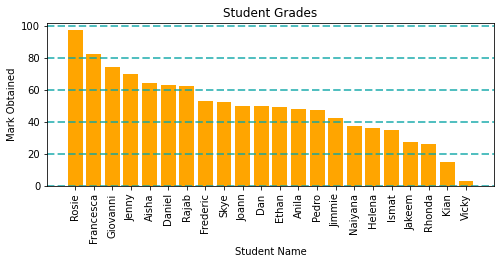

In [24]:
# Visualize grades obtained by each student
fig=plt.figure(figsize=(8,3))
plt.bar(x=df_students.Name,height=df_students.Grade,color='orange')
plt.xticks(rotation=90)
plt.xlabel('Student Name')
plt.ylabel('Mark Obtained')
plt.title("Student Grades")
plt.grid(color="#09a5a6",linestyle='--',linewidth=2,alpha=0.7,axis='y')
plt.show()

C:\Users\Tinashe.Kaseke\python\lib\site-packages\ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.
C:\Users\Tinashe.Kaseke\python\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


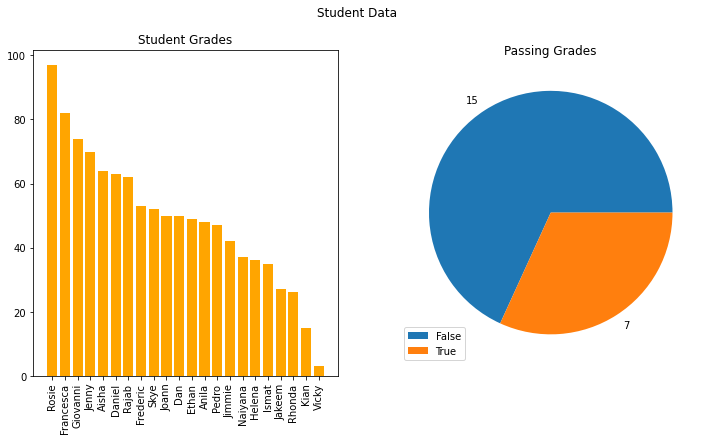

In [27]:
# Create subplots to visualize individual marks obtained [bar] and the passes for the whole class [pie]
fig,ax=plt.subplots(1,2,figsize=(12,6))
ax[0].bar(x=df_students.Name,height=df_students.Grade,color='orange')
ax[0].set_xticklabels(df_students.Name,rotation=90)
ax[0].set_title('Student Grades')
pass_counts=df_students['Pass'].value_counts()
ax[1].pie(pass_counts,labels=pass_counts)
ax[1].set_title("Passing Grades")
ax[1].legend(pass_counts.keys().tolist())
fig.suptitle('Student Data')
fig.show()

<AxesSubplot:xlabel='Name'>

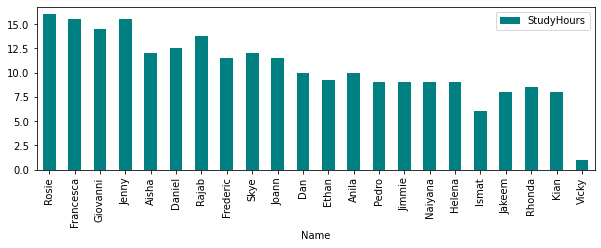

In [29]:
# Pandas bar plot
df_students.plot.bar(x='Name',y='StudyHours',color='teal',figsize=(10,3))

C:\Users\Tinashe.Kaseke\python\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


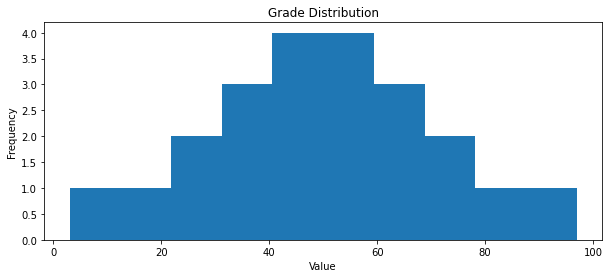

In [28]:
# Visualize the distribution of student marks 
var_data=df_students['Grade']
fig=plt.figure(figsize=(10,4))
plt.hist(var_data)
plt.title("Grade Distribution")
plt.xlabel('Value')
plt.ylabel("Frequency")
fig.show()

* The histogram for grades is a symmetric shape, 
* where the most frequently occurring grades tend to be in the middle of the range (around 50), 
* with fewer grades at the extreme ends of the scale

In [30]:
# Calculate Measures of Central Tendency
var=df_students['Grade']
min_val=var.min()
max_val=var.max()
mean_val=var.mean()
med_val=var.median()
mod_val=var.mode()[0]
print('The minimum value is:{:.2f}\nThe maximum value is:{:.2f}\nThe mean value is:{:.2f}\nThe median value is:{:.2f}\nThe modal value is:{:.2f}\n'.format(min_val,max_val,mean_val,med_val,mod_val))

The minimum value is:3.00
The maximum value is:97.00
The mean value is:49.18
The median value is:49.50
The modal value is:50.00



In [ ]:
var=df_students['Grade']
min_val=var.min()
max_val=var.max()
mean_val=var.mean()
med_val=var.median()
mod_val=var.mode()[0]
print('The minimum value is:{:.2f}\nThe maximum value is:{:.2f}\nThe mean value is:{:.2f}\nThe median value is:{:.2f}\nThe modal value is:{:.2f}\n'.format(min_val,max_val,mean_val,med_val,mod_val))

C:\Users\Tinashe.Kaseke\python\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


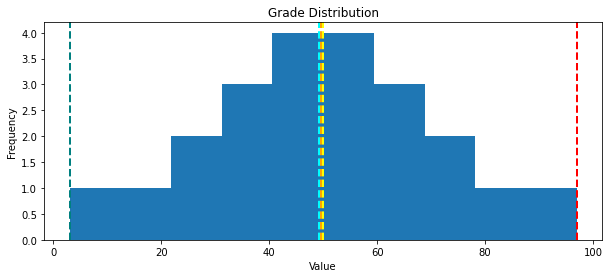

In [31]:
# Add lines for the statistics computed
fig=plt.figure(figsize=(10,4))
plt.hist(var)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title("Grade Distribution")
plt.axvline(x=min_val,color='teal',linestyle='--',linewidth=2)
plt.axvline(x=max_val,color='red',linestyle='--',linewidth=2)
plt.axvline(x=mean_val,color='cyan',linestyle='--',linewidth=2)
plt.axvline(x=med_val,color='orange',linestyle='--',linewidth=2)
plt.axvline(x=mod_val,color='yellow',linestyle='--',linewidth=2)
fig.show()

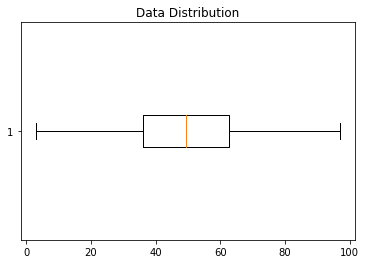

In [32]:
# Plot data distribution in a box plot
plt.boxplot(var,vert=False)
plt.title("Data Distribution")
plt.show()

# Create function to plot a distribution graph of data

In [22]:
# Import library
%matplotlib inline
from matplotlib import pyplot as plt

Minimum:3.00
Maximum:97.00
Mean:49.18
Median:49.50
Mode:50.00



C:\Users\Tinashe.Kaseke\python\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


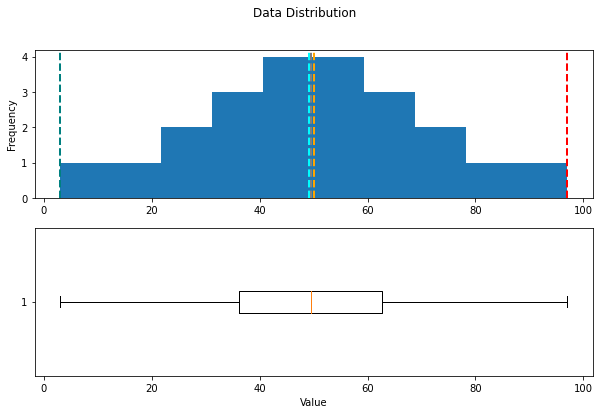

In [33]:
def show_distribution(var):
    min_val=var.min()
    max_val=var.max()
    mean_val=var.mean()
    med_val=var.median()
    mod_val=var.mode()[0]
    print("Minimum:{:.2f}\nMaximum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\n".format(min_val,max_val,mean_val,med_val,mod_val))
    
    fig,ax=plt.subplots(2,1,figsize=(10,6))
    ax[0].hist(var)
    ax[0].set_ylabel('Frequency')
    ax[0].axvline(x=min_val,linestyle='dashed',color='teal',linewidth=2)
    ax[0].axvline(x=max_val,linestyle='dashed',color='red',linewidth=2)
    ax[0].axvline(x=mean_val,linestyle='dashed',color='cyan',linewidth=2)
    ax[0].axvline(x=med_val,linestyle='dashed',color='gray',linewidth=2)
    ax[0].axvline(x=mod_val,linestyle='dashed',color='orange',linewidth=2)
    ax[1].boxplot(var,vert=False)
    ax[1].set_xlabel('Value')
    fig.suptitle("Data Distribution")
    fig.show()

col=df_students['Grade']
show_distribution(col)


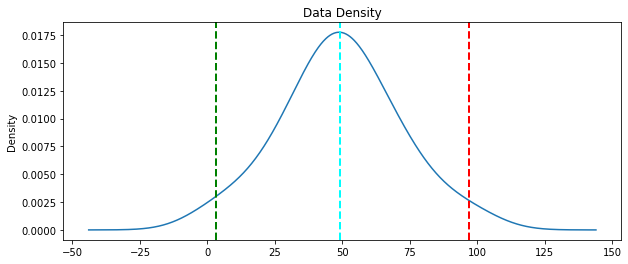

In [34]:
# Calculating probability density function to estimate distribution of grades for the full population
def show_density(var):
    fig=plt.figure(figsize=(10,4))
    var.plot.density()
    plt.title("Data Density")
    plt.axvline(x=min_val,linestyle='dashed',linewidth=2,color='green')
    plt.axvline(x=max_val,linestyle='dashed',linewidth=2,color='red')
    plt.axvline(x=mean_val,linestyle='dashed',linewidth=2,color='cyan')
    plt.show()
    
col=df_students['Grade']
show_density(col)

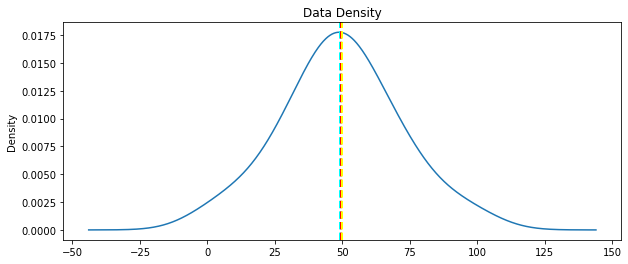

In [35]:
def show_density(var_data):
    from matplotlib import pyplot as plt
    fig = plt.figure(figsize=(10,4))
    # Plot density
    var_data.plot.density()
    # Add titles and labels
    plt.title('Data Density')
    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)
    # Show the figure
    plt.show()
# Get the density of Grade
col = df_students['Grade']
show_density(col)


In [36]:
# Eliminate outliers
col=df_students[df_students['StudyHours']>1]['StudyHours']

Minimum:6.00
Maximum:16.00
Mean:10.98
Median:10.00
Mode:9.00



C:\Users\Tinashe.Kaseke\python\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


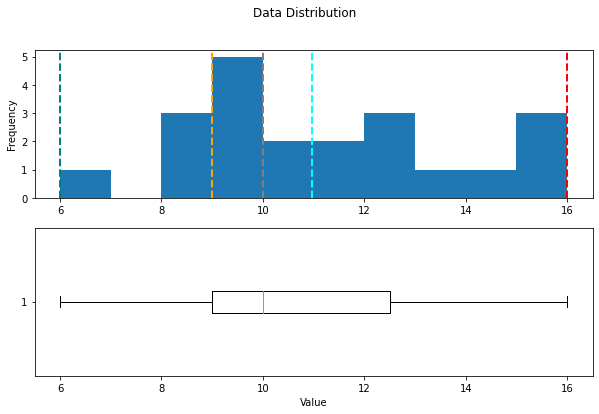

In [37]:
# Plot without outliers
show_distribution(col)

In [38]:
# To exclude observations below the 0.01th percentile (the value above which 99% of the data reside)
q1=df_students.StudyHours.quantile(0.01)

In [39]:
# Get the variable we are examining
col=df_students[df_students['StudyHours']>q1]['StudyHours']

Minimum:6.00
Maximum:16.00
Mean:10.98
Median:10.00
Mode:9.00



C:\Users\Tinashe.Kaseke\python\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


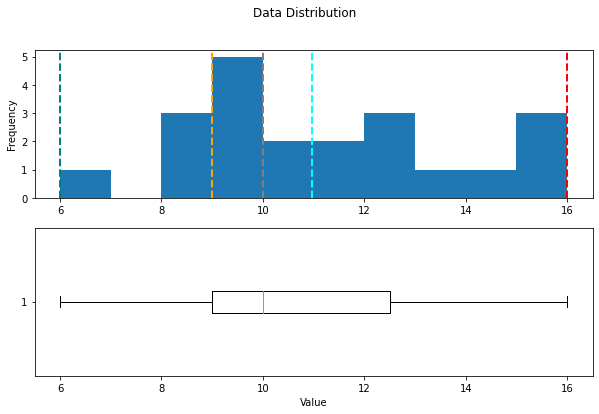

In [40]:
# Plot the distribution
show_distribution(col)

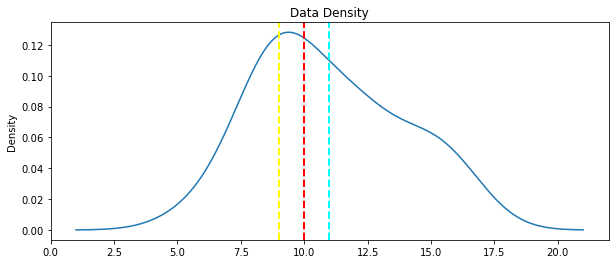

In [42]:
# Display the Probability Density
show_density(col)

* distribution is right skewed - the mass of the data is on the left side of the distribution, creating a long tail to the right 

# Measures of variance

In [43]:
# Compute measures of variance
for col_name in ['Grade',"StudyHours"]:
    col=df_students[col_name]
    rng=col.max()-col.min()
    var=col.var()
    std=col.std()
    print("Range:{:.2f}\nVariance:{:.2f}\nStandard deviation:{:.2f}".format(rng,var,std))

Range:94.00
Variance:472.54
Standard deviation:21.74
Range:15.00
Variance:12.16
Standard deviation:3.49


In [44]:
# To see the relationship between standard deviations and the data in the normal distribution
# Import Scipy library
import scipy.stats as stats


In [45]:
# Get the grade column
col=df_students['Grade']

In [46]:
# Get the density
density=stats.gaussian_kde(col)

<AxesSubplot:ylabel='Density'>

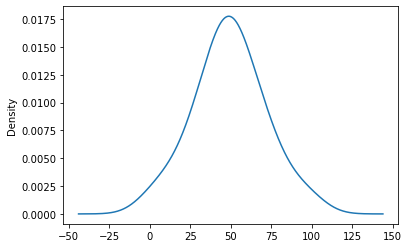

In [47]:
# Plot the density
col.plot.density()

In [48]:
# Get the mean and standard deviation
s=col.std()
m=col.mean()

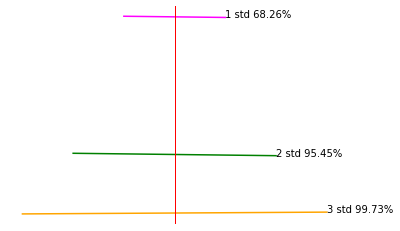

In [49]:
# Annotate 1 standard deviation
x1=[m-s,m+s]
y1=density(x1)
plt.plot(x1,y1,color='magenta')
plt.annotate('1 std 68.26%',(x1[1],y1[1]))
#Annotate 2 standard deviations
x2=[m-(s*2),m+(s*2)]
y2=density(x2)
plt.plot(x2,y2,color='green')
plt.annotate('2 std 95.45%',(x2[1],y2[1]))
#Annotate 3 standard deviations
x3=[m-(s*3),m+(s*3)]
y3=density(x3)
plt.plot(x3,y3,color='orange')
plt.annotate('3 std 99.73%',(x3[1],y3[1]))
#Show location of mean
plt.axvline(x=col.mean(),linewidth=1,color='red')
plt.axis('off')
plt.show()

* The horizontal lines show the percentage of data within 1, 2, and 3 standard deviations of the mean (plus or minus).
* In any normal distribution:
* Approximately 68.26% of values fall within one standard deviation from the mean.
* Approximately 95.45% of values fall within two standard deviations from the mean.
* Approximately 99.73% of values fall within three standard deviations from the mean.
* We know that the mean grade is 49.18, the standard deviation is 21.74, and distribution of grades is approximately normal; we can calculate that 68.26% of students should achieve a grade between 27.44 and 70.92.


In [52]:
# To identify relationships between the variables
# Comparing numerical and categorical variables
# Creating a new dataframe, removing outliers
df_sample=df_students[df_students['StudyHours']>1]
df_sample


,Name,StudyHours,Grade,Pass
3,Rosie,16.00,97.0,True
10,Francesca,15.50,82.0,True
9,Giovanni,14.50,74.0,True
14,Jenny,15.50,70.0,True
21,Aisha,12.00,64.0,True
20,Daniel,12.50,63.0,True
11,Rajab,13.75,62.0,True
6,Frederic,11.50,53.0,False
19,Skye,12.00,52.0,False
1,Joann,11.50,50.0,False


<AxesSubplot:title={'center':'StudyHours'}, xlabel='Pass'>

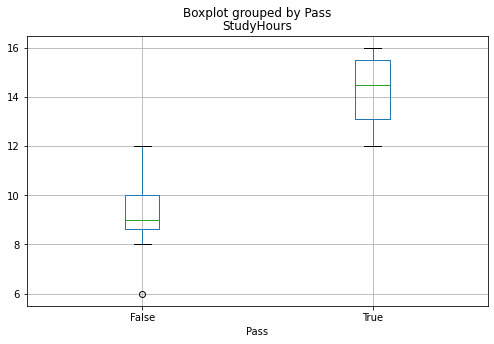

In [53]:
# Distribution of StudyHours for each possible Pass value
df_sample.boxplot(column='StudyHours',by='Pass',figsize=(8,5))

* students who passed the course tended to study for more hours than students who didn't.

<AxesSubplot:xlabel='Name'>

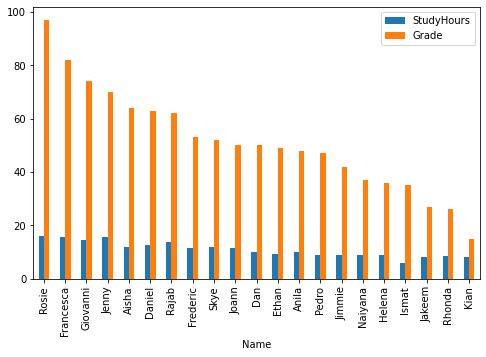

In [54]:
# Comparing numerical variables
# Bar of Name vs Study Hours and Grade
df_sample.plot(x='Name',y=['StudyHours','Grade'],kind='bar',figsize=(8,5))

* it's not easy to compare because the values are on different scales
* therefore we normalize
* by applying MinMax scaling that distributes the values proportionally on a scale of 0 to 1

In [55]:
from sklearn.preprocessing import MinMaxScaler

In [56]:
# Get the scaler
scaler=MinMaxScaler()

In [57]:
# Create a copy of the data
df_normalized=df_sample[['Name','StudyHours','Grade']].copy()

In [58]:
# Normalize te numeric columns
df_normalized[['StudyHours','Grade']]=scaler.fit_transform(df_normalized[['StudyHours','Grade']])

<AxesSubplot:xlabel='Name'>

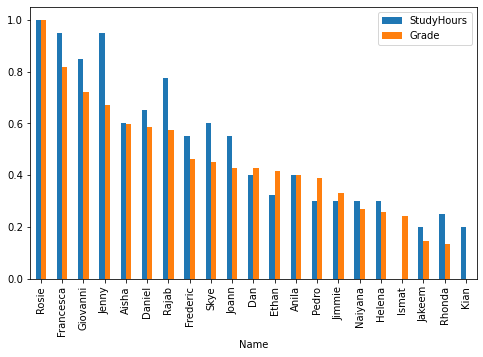

In [59]:
#Plot the normalized
df_normalized.plot(x='Name',y=['StudyHours','Grade'],kind='bar',figsize=(8,5))

* an apparent relationship between grade and study time. It's not an exact match, but it definitely seems like students with higher grades tend to have studied more
* So there seems to be a correlation between study time and grade

In [60]:
# Compute statistical correlation measurement
df_normalized.StudyHours.corr(df_normalized.Grade)

0.9117666413789673

* strongly positive correlation between study time and grade.

<AxesSubplot:title={'center':'Study Hours v Grade'}, xlabel='StudyHours', ylabel='Grade'>

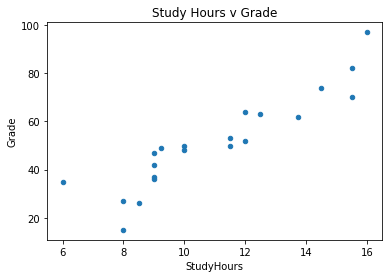

In [61]:
# Visualize relationship with a scatter plot
df_sample.plot.scatter(title='Study Hours v Grade',x='StudyHours',y='Grade')

* To plot regression line use lingress method from Scipy's Stats library

In [62]:
# Obtain copy of data to compute regression line
df_regression=df_sample[['Grade','StudyHours']].copy()

In [63]:
# Get regression slope and intercept
m,b,r,p,se=stats.linregress(df_regression['StudyHours'],df_regression['Grade'])

In [64]:
# Display results
print('slope: {:.4f}\nintercept: {:.4f}'.format(m,b))
print('Therefore y = {:.4f}x + {:.4f}'.format(m,b))

slope: 6.3134
intercept: -17.9164
Therefore y = 6.3134x + -17.9164


In [65]:
# Use the function to calculate f(x) for each StudyHours value
df_regression['f(x)']= (m*df_regression['StudyHours'])+b

In [66]:
# Calculate the error between f(x) and the actual y (Grade) value
df_regression['error']=df_regression['f(x)']-df_regression['Grade']

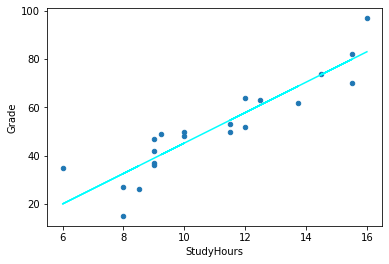

In [67]:
# Display the plot
df_regression.plot.scatter(x='StudyHours',y='Grade')
plt.plot(df_regression['StudyHours'],df_regression['f(x)'],color='cyan')
plt.show()

In [68]:
# Show the table of values
df_regression[['StudyHours','Grade','f(x)','error']]

,StudyHours,Grade,f(x),error
3,16.00,97.0,83.098400,-13.901600
10,15.50,82.0,79.941687,-2.058313
9,14.50,74.0,73.628262,-0.371738
14,15.50,70.0,79.941687,9.941687
21,12.00,64.0,57.844698,-6.155302
20,12.50,63.0,61.001410,-1.998590
11,13.75,62.0,68.893193,6.893193
6,11.50,53.0,54.687985,1.687985
19,12.00,52.0,57.844698,5.844698
1,11.50,50.0,54.687985,4.687985


In [69]:
# Create a function to estimate the expected grade for a given amount of study
def f(x):
    m = 6.3134
    b = -17.9164
    return m*x + b

study_time = 14
prediction = f(study_time)
# Grade can't be less than 0 or more than 100
expected_grade=max(0,min(100,prediction))
print('Studying for {:.0f} hours per week may result in a grade of {:.0f}'.format(study_time,expected_grade))

Studying for 14 hours per week may result in a grade of 70
